   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


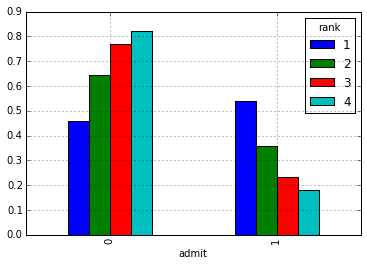

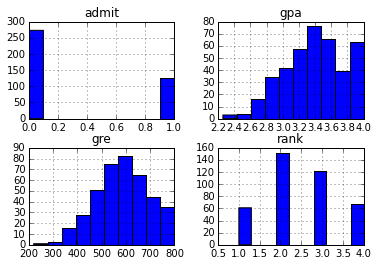

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data/grad.csv')
print data.head()
admit = pd.crosstab(data['admit'],data['rank'],rownames=['admit'])
(admit / admit.apply(sum)).plot(kind="bar")
data.hist()
plt.show()

In [57]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

y = data['admit'].values
X = data[['gre','gpa','rank']].values
Xconstant = add_constant(X, prepend=True)
smlogmodel = Logit(y,Xconstant).fit()
smlogmodel.summary()

Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 Jun 2015   Pseudo R-squ.:                 0.08107
Time:                        11:46:09   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 8.207e-09
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.4495      1.133     -3.045      0.002        -5.670    -1.229
x1             0.0023      0.001      2.101      0.036         0.000     0.004
x2             0.7770      0.327      2.373      0.018         0.135     1.419
x3            -0.5600      0.127     -4.405      0.000        -0.809    -0.311
==============================================================================
"""

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cross_validation import KFold

y = data['admit']
X = data[['gre','gpa','rank']]
kfold = KFold(len(y))

accuracies = []
precisons = []
recalls = []

logmodel = LogisticRegression()
logmodel.fit(X,y)
# cross_validation.KFold()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)